### Data
foo_050_fish_capture_and_production <br>
https://resourcewatch.carto.com/u/wri-rw/dataset/foo_050_fish_capture_and_production<br>

In [1]:
import numpy as np
import vega
import json
from vega import Vega

### Resource Watch specification
API ID: a8c89ec6-d8ba-487a-88b9-4a7ba9078138 <br>
https://resourcewatch.org/embed/widget/a8c89ec6-d8ba-487a-88b9-4a7ba9078138

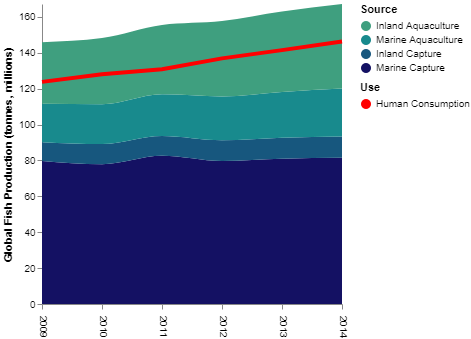

In [2]:
specV3=json.loads("""
{
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {
          "update": "datum",
          "events": "@cell:mouseover"
        },
        {
          "update": "null",
          "events": "@cell:mouseout"
        }
      ]
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://api.resourcewatch.org/v1/query/ffbd7953-fffa-4e58-a65d-7144ea1d3c37?sql=SELECT year AS x, value AS y, production_or_use AS c FROM foo_050_fish_capture_and_production WHERE production_or_use IN ('Inland Aquaculture','Marine Aquaculture','Inland Capture','Marine Capture') ORDER BY year ASC, production_or_use!='Marine Capture', production_or_use!='Inland Capture', production_or_use!='Marine Aquaculture', production_or_use!='Inland Aquaculture'",
      "format": {
        "type": "json",
        "property": "data"
      },
      "transform": [
        {
          "type": "stack",
          "field": "y",
          "groupby": [
            "x"
          ]
        }
      ]
    },
    {
      "name": "consumption",
      "url": "https://api.resourcewatch.org/v1/query/ffbd7953-fffa-4e58-a65d-7144ea1d3c37?sql=SELECT year AS x, value AS y, production_or_use AS c FROM foo_050_fish_capture_and_production WHERE production_or_use='Human consumption' ORDER BY year ASC",
      "format": {
        "type": "json",
        "property": "data"
      }
    },
    {
      "transform": [
        {
          "expr": "hover && hover.datum.x === datum.x && hover.datum.y === datum.y",
          "type": "filter"
        }
      ],
      "source": "table",
      "name": "dots"
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "point",
      "range": "width",
      "domain": {
        "data": "table",
        "field": "x"
      }
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": false,
      "zero": true,
      "domain": {
        "data": "table",
        "field": "y1"
      }
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": [
        "#3f9f7f",
        "#188a8d",
        "#17577e",
        "#141163"
      ],
      "domain": [
        "Inland Aquaculture",
        "Marine Aquaculture",
        "Inland Capture",
        "Marine Capture"
      ]
    },
    {
      "name": "line-color",
      "type": "ordinal",
      "range": [
        "#F00"
      ],
      "domain": [
        "Human Consumption"
      ]
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "x",
      "zindex": 1,
      "labelOverlap": "parity",
      "labelPadding": 6,
      "encode": {
        "labels": {
          "update": {
            "limit": {
              "value": 50
            },
            "angle": {
              "value": 90
            },
            "align": {
              "value": "middle"
            },
            "baseline": {
              "value": "middle"
            }
          }
        }
      }
    },
    {
      "title": "Global Fish Production (tonnes, millions)",
      "orient": "left",
      "scale": "y",
      "zindex": 0,
      "labelOverlap": "parity"
    }
  ],
  "marks": [
    {
      "marks": [
        {
          "encode": {
            "hover": {
              "fillOpacity": {
                "value": 1
              }
            },
            "update": {
              "fillOpacity": {
                "value": 1
              }
            },
            "enter": {
              "fill": {
                "field": "c",
                "scale": "color"
              },
              "y2": {
                "field": "y1",
                "scale": "y"
              },
              "y": {
                "field": "y0",
                "scale": "y"
              },
              "width": {
                "scale": "x",
                "band": 1,
                "offset": "-1"
              },
              "x": {
                "field": "x",
                "scale": "x"
              },
              "interpolate": {
                "value": "monotone"
              }
            }
          },
          "from": {
            "data": "series"
          },
          "type": "area"
        }
      ],
      "from": {
        "facet": {
          "groupby": "c",
          "data": "table",
          "name": "series"
        }
      },
      "type": "group",
      "name": "areas"
    },
    {
      "encode": {
        "enter": {
          "opacity": {
            "value": 0
          },
          "y": {
            "field": "y1",
            "scale": "y"
          },
          "x": {
            "field": "x",
            "scale": "x"
          }
        }
      },
      "from": {
        "data": "table"
      },
      "type": "symbol",
      "interactive": false,
      "name": "pointss"
    },
    {
      "encode": {
        "update": {
          "opacity": {
            "value": 1
          },
          "stroke": {
            "value": "#fff"
          },
          "fill": {
            "field": "c",
            "scale": "color"
          }
        },
        "enter": {
          "y": {
            "field": "y1",
            "scale": "y"
          },
          "x": {
            "field": "x",
            "scale": "x"
          }
        }
      },
      "from": {
        "data": "dots"
      },
      "type": "symbol",
      "interactive": false,
      "name": "points"
    },
    {
      "encode": {
        "update": {
          "opacity": {
            "value": 0
          },
          "path": {
            "field": "path"
          },
          "fill": {
            "value": "red"
          }
        }
      },
      "transform": [
        {
          "size": [
            {
              "signal": "width"
            },
            {
              "signal": "height"
            }
          ],
          "y": "datum.y",
          "x": "datum.x",
          "type": "voronoi"
        }
      ],
      "from": {
        "data": "pointss"
      },
      "type": "path",
      "name": "cell"
    },
    {
      "type": "line",
      "from": {
        "data": "consumption"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "x",
            "field": "x"
          },
          "y": {
            "scale": "y",
            "field": "y"
          },
          "stroke": {
            "value": "#F00"
          },
          "strokeWidth": {
            "value": 4
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": "Source",
      "fill": "color",
      "orient": "right"
    },
    {
      "title": "Use",
      "fill": "line-color",
      "orient": "right"
    }
  ],
  "interaction_config": [
    {
      "name": "tooltip",
      "config": {
        "fields": [
          {
            "column": "datum.y",
            "property": "Global Fish Production (Mt)",
            "type": "number",
            "format": ".3r"
          },
          {
            "column": "datum.c",
            "property": "Source",
            "type": "string"
          },
          {
            "column": "datum.x",
            "property": "Year",
            "type": "string"
          }
        ]
      }
    }
  ]
}
""")
vega4view=dict(specV3)
vega4view['width']=300
vega4view['height']=300
Vega(vega4view)

### Stand-alone specification
(eg for use with https://vega.github.io/editor/#/)

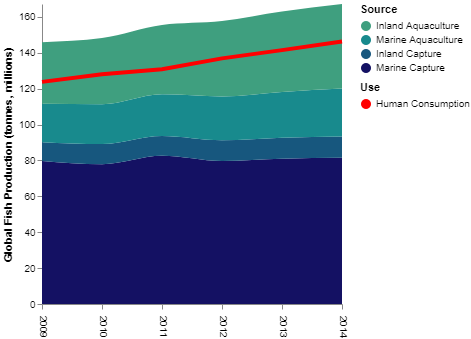

In [4]:
specV3=json.loads("""
{
  "width":300,
  "height":300,
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {
          "update": "datum",
          "events": "@cell:mouseover"
        },
        {
          "update": "null",
          "events": "@cell:mouseout"
        }
      ]
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT year AS x, value AS y, production_or_use AS c FROM foo_050_fish_capture_and_production WHERE production_or_use IN ('Inland Aquaculture','Marine Aquaculture','Inland Capture','Marine Capture') ORDER BY year ASC, production_or_use!='Marine Capture', production_or_use!='Inland Capture', production_or_use!='Marine Aquaculture', production_or_use!='Inland Aquaculture'",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "stack",
          "field": "y",
          "groupby": [
            "x"
          ]
        }
      ]
    },
    {
      "name": "consumption",
      "url": "https://api.resourcewatch.org/v1/query/ffbd7953-fffa-4e58-a65d-7144ea1d3c37?sql=SELECT year AS x, value AS y, production_or_use AS c FROM foo_050_fish_capture_and_production WHERE production_or_use='Human consumption' ORDER BY year ASC",
      "format": {
        "type": "json",
        "property": "data"
      }
    },
    {
      "transform": [
        {
          "expr": "hover && hover.datum.x === datum.x && hover.datum.y === datum.y",
          "type": "filter"
        }
      ],
      "source": "table",
      "name": "dots"
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "point",
      "range": "width",
      "domain": {
        "data": "table",
        "field": "x"
      }
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": false,
      "zero": true,
      "domain": {
        "data": "table",
        "field": "y1"
      }
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": [
        "#3f9f7f",
        "#188a8d",
        "#17577e",
        "#141163"
      ],
      "domain": [
        "Inland Aquaculture",
        "Marine Aquaculture",
        "Inland Capture",
        "Marine Capture"
      ]
    },
    {
      "name": "line-color",
      "type": "ordinal",
      "range": [
        "#F00"
      ],
      "domain": [
        "Human Consumption"
      ]
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "x",
      "zindex": 1,
      "labelOverlap": "parity",
      "labelPadding": 6,
      "encode": {
        "labels": {
          "update": {
            "limit": {
              "value": 50
            },
            "angle": {
              "value": 90
            },
            "align": {
              "value": "middle"
            },
            "baseline": {
              "value": "middle"
            }
          }
        }
      }
    },
    {
      "title": "Global Fish Production (tonnes, millions)",
      "orient": "left",
      "scale": "y",
      "zindex": 0,
      "labelOverlap": "parity"
    }
  ],
  "marks": [
    {
      "marks": [
        {
          "encode": {
            "hover": {
              "fillOpacity": {
                "value": 1
              }
            },
            "update": {
              "fillOpacity": {
                "value": 1
              }
            },
            "enter": {
              "fill": {
                "field": "c",
                "scale": "color"
              },
              "y2": {
                "field": "y1",
                "scale": "y"
              },
              "y": {
                "field": "y0",
                "scale": "y"
              },
              "width": {
                "scale": "x",
                "band": 1,
                "offset": "-1"
              },
              "x": {
                "field": "x",
                "scale": "x"
              },
              "interpolate": {
                "value": "monotone"
              }
            }
          },
          "from": {
            "data": "series"
          },
          "type": "area"
        }
      ],
      "from": {
        "facet": {
          "groupby": "c",
          "data": "table",
          "name": "series"
        }
      },
      "type": "group",
      "name": "areas"
    },
    {
      "encode": {
        "enter": {
          "opacity": {
            "value": 0
          },
          "y": {
            "field": "y1",
            "scale": "y"
          },
          "x": {
            "field": "x",
            "scale": "x"
          }
        }
      },
      "from": {
        "data": "table"
      },
      "type": "symbol",
      "interactive": false,
      "name": "pointss"
    },
    {
      "encode": {
        "update": {
          "opacity": {
            "value": 1
          },
          "stroke": {
            "value": "#fff"
          },
          "fill": {
            "field": "c",
            "scale": "color"
          }
        },
        "enter": {
          "y": {
            "field": "y1",
            "scale": "y"
          },
          "x": {
            "field": "x",
            "scale": "x"
          }
        }
      },
      "from": {
        "data": "dots"
      },
      "type": "symbol",
      "interactive": false,
      "name": "points"
    },
    {
      "encode": {
        "update": {
          "opacity": {
            "value": 0
          },
          "path": {
            "field": "path"
          },
          "fill": {
            "value": "red"
          }
        },
        "hover": {
          "tooltip": {
            "signal": "{'Production':format(hover.datum.y,'.3r')+' Mt', 'Source':hover.datum.c, 'Year':hover.datum.x}"
          }
        }
      },
      "transform": [
        {
          "size": [
            {
              "signal": "width"
            },
            {
              "signal": "height"
            }
          ],
          "y": "datum.y",
          "x": "datum.x",
          "type": "voronoi"
        }
      ],
      "from": {
        "data": "pointss"
      },
      "type": "path",
      "name": "cell"
    },
    {
      "type": "line",
      "from": {
        "data": "consumption"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "x",
            "field": "x"
          },
          "y": {
            "scale": "y",
            "field": "y"
          },
          "stroke": {
            "value": "#F00"
          },
          "strokeWidth": {
            "value": 4
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": "Source",
      "fill": "color",
      "orient": "right"
    },
    {
      "title": "Use",
      "fill": "line-color",
      "orient": "right"
    }
  ]
}
""")
vega4view=dict(specV3)
Vega(vega4view)